In [237]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [238]:
n225 = pd.read_csv("/content/drive/MyDrive/comsumer_temperature/datasets/^N225_daily_data_2.csv", index_col=0)
n225.head()

,Date,Open,High,Low,Close,Adj Close,Volume,POSIX,year,month
0,1980-01-04,6560.160156,6560.160156,6560.160156,6560.160156,6560.160156,0,315792000,1980,1
1,1980-01-07,6552.649902,6552.649902,6552.649902,6552.649902,6552.649902,0,316051200,1980,1
2,1980-01-08,6563.279785,6563.279785,6563.279785,6563.279785,6563.279785,0,316137600,1980,1
3,1980-01-09,6591.830078,6591.830078,6591.830078,6591.830078,6591.830078,0,316224000,1980,1
4,1980-01-10,6594.009766,6594.009766,6594.009766,6594.009766,6594.009766,0,316310400,1980,1


In [239]:
n225 = n225[['Date', 'POSIX', 'year', 'month', 'Adj Close' ]]
n225.head()

,Date,POSIX,year,month,Adj Close
0,1980-01-04,315792000,1980,1,6560.160156
1,1980-01-07,316051200,1980,1,6552.649902
2,1980-01-08,316137600,1980,1,6563.279785
3,1980-01-09,316224000,1980,1,6591.830078
4,1980-01-10,316310400,1980,1,6594.009766


In [240]:
n225 = n225.groupby(["year", "month"])["Adj Close"].mean().reset_index(drop=False)
n225.head()

,year,month,Adj Close
0,1980,1,6670.249409
1,1980,2,6787.146509
2,1980,3,6600.329032
3,1980,4,6757.300014
4,1980,5,6799.953334


In [241]:
n225 = n225.iloc[420:, :]

In [242]:
month = 5

for i in range(1, month):
    n225[f"{i}_Adj Close"] = n225["Adj Close"].shift(i)

n225 = n225.dropna(axis=0)
n225 = n225.reset_index(drop=True)
n225.head()


,year,month,Adj Close,1_Adj Close,2_Adj Close,3_Adj Close,4_Adj Close
0,2015,5,19974.187391,19767.923363,19197.567738,18053.204461,17274.399671
1,2015,6,20403.840288,19974.187391,19767.923363,19197.567738,18053.204461
2,2015,7,20372.583984,20403.840288,19974.187391,19767.923363,19197.567738
3,2015,8,19919.090402,20372.583984,20403.840288,19974.187391,19767.923363
4,2015,9,17944.223170,19919.090402,20372.583984,20403.840288,19974.187391


In [243]:
consumption = pd.read_csv("/content/drive/MyDrive/comsumer_temperature/datasets/comsumption_3.csv", index_col=0)
consumption.head()

,日付コード,日付,支出,POSIX,年,月,1mago,2mago,3mago,4mago
0,2015000505,2015-05-01,10602,1430438400,2015,5,10238.0,10802.0,10397.0,11599.0
1,2015000606,2015-06-01,11586,1433116800,2015,6,10602.0,10238.0,10802.0,10397.0
2,2015000707,2015-07-01,11241,1435708800,2015,7,11586.0,10602.0,10238.0,10802.0
3,2015000808,2015-08-01,11962,1438387200,2015,8,11241.0,11586.0,10602.0,10238.0
4,2015000909,2015-09-01,9788,1441065600,2015,9,11962.0,11241.0,11586.0,10602.0


In [244]:
consumption = consumption.rename(columns={"年": "year",
                                  "月": "month"})
consumption.head()

,日付コード,日付,支出,POSIX,year,month,1mago,2mago,3mago,4mago
0,2015000505,2015-05-01,10602,1430438400,2015,5,10238.0,10802.0,10397.0,11599.0
1,2015000606,2015-06-01,11586,1433116800,2015,6,10602.0,10238.0,10802.0,10397.0
2,2015000707,2015-07-01,11241,1435708800,2015,7,11586.0,10602.0,10238.0,10802.0
3,2015000808,2015-08-01,11962,1438387200,2015,8,11241.0,11586.0,10602.0,10238.0
4,2015000909,2015-09-01,9788,1441065600,2015,9,11962.0,11241.0,11586.0,10602.0


In [245]:
df_merge = pd.merge(consumption, n225, on=["year", "month"])
df_merge.shape

(100, 15)

In [246]:
df_merge.to_csv("/content/drive/MyDrive/comsumer_temperature/datasets/N225_consumption.csv")

In [247]:
df_merge = df_merge.rename(columns={"支出": "mago"})
df_merge.head()

,日付コード,日付,mago,POSIX,year,month,1mago,2mago,3mago,4mago,Adj Close,1_Adj Close,2_Adj Close,3_Adj Close,4_Adj Close
0,2015000505,2015-05-01,10602,1430438400,2015,5,10238.0,10802.0,10397.0,11599.0,19974.187391,19767.923363,19197.567738,18053.204461,17274.399671
1,2015000606,2015-06-01,11586,1433116800,2015,6,10602.0,10238.0,10802.0,10397.0,20403.840288,19974.187391,19767.923363,19197.567738,18053.204461
2,2015000707,2015-07-01,11241,1435708800,2015,7,11586.0,10602.0,10238.0,10802.0,20372.583984,20403.840288,19974.187391,19767.923363,19197.567738
3,2015000808,2015-08-01,11962,1438387200,2015,8,11241.0,11586.0,10602.0,10238.0,19919.090402,20372.583984,20403.840288,19974.187391,19767.923363
4,2015000909,2015-09-01,9788,1441065600,2015,9,11962.0,11241.0,11586.0,10602.0,17944.223170,19919.090402,20372.583984,20403.840288,19974.187391


In [248]:
df_merge = df_merge.drop(["日付コード", "日付"], axis=1)
df_merge.head()

,mago,POSIX,year,month,1mago,2mago,3mago,4mago,Adj Close,1_Adj Close,2_Adj Close,3_Adj Close,4_Adj Close
0,10602,1430438400,2015,5,10238.0,10802.0,10397.0,11599.0,19974.187391,19767.923363,19197.567738,18053.204461,17274.399671
1,11586,1433116800,2015,6,10602.0,10238.0,10802.0,10397.0,20403.840288,19974.187391,19767.923363,19197.567738,18053.204461
2,11241,1435708800,2015,7,11586.0,10602.0,10238.0,10802.0,20372.583984,20403.840288,19974.187391,19767.923363,19197.567738
3,11962,1438387200,2015,8,11241.0,11586.0,10602.0,10238.0,19919.090402,20372.583984,20403.840288,19974.187391,19767.923363
4,9788,1441065600,2015,9,11962.0,11241.0,11586.0,10602.0,17944.223170,19919.090402,20372.583984,20403.840288,19974.187391


In [249]:
y = df_merge["mago"].values
X = df_merge.drop(["mago", "Adj Close", "1_Adj Close", "2_Adj Close", "3_Adj Close", "4_Adj Close"], axis=1).values

In [250]:
N = len(df_merge["POSIX"])
N_train = round(N * .80)

In [251]:
X_train, y_train = X[:N_train], y[:N_train]
X_test, y_test = X[N_train:], y[N_train:]

In [252]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100,
                           random_state=0)

rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [253]:
y_pred = rf.predict(X_test)

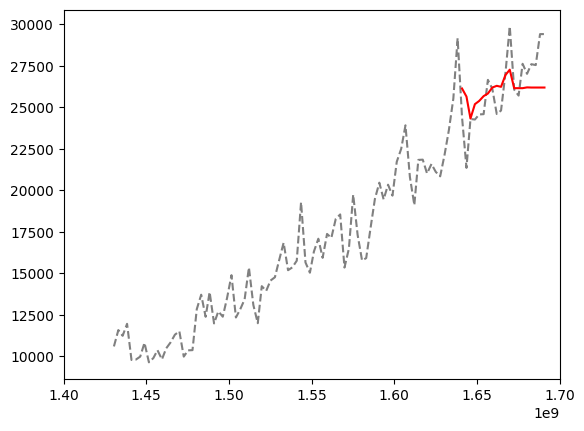

In [254]:
plt.plot(X, y, color="gray", linestyle="--")
plt.plot(X_test, y_pred, color="red")
plt.xlim([1.4e9, 1.7e9])
plt.show()

In [255]:
rf.score(X_train, y_train)

0.987559110294092

In [256]:
rf.score(X_test, y_test)

0.25109890520649236

In [257]:
X2 = df_merge.drop(["Adj Close", "mago", "1mago", "2mago", "3mago", "4mago"], axis=1).values
y2 = df_merge["Adj Close"].values

rf2 = RandomForestRegressor(n_estimators=100,
                            random_state=0)


X2_train, y2_train = X2[:N_train], y2[:N_train]
X2_test, y2_test = X2[N_train:], y2[N_train:]

rf2.fit(X2_train, y2_train)

RandomForestRegressor(random_state=0)

In [258]:
y2_pred = rf2.predict(X2_test)

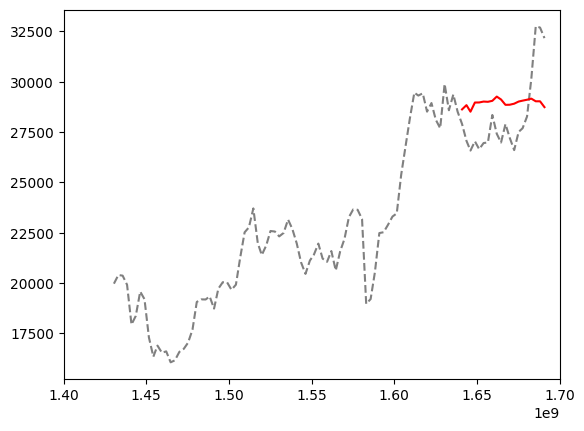

In [259]:
plt.plot(X2, y2, color="gray", linestyle="--")
plt.plot(X2_test, y2_pred, color="red")
plt.xlim([1.4e9, 1.7e9])
plt.show()